In [14]:
import warnings
warnings.filterwarnings("ignore")


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV dosyasını oku
df = pd.read_csv("data/Mastercard_historical_data.csv")

# İlk 5 satırı göster
df.head()


,Date,Open,High,Low,Close,Volume,ticker,name
0,2006-05-25 00:00:00-04:00,3.662180,4.184700,3.653093,4.180156,395343000,MA,Mastercard Inc. (MA) Historical Data
1,2006-05-26 00:00:00-04:00,4.207417,4.247400,4.008405,4.082921,103044000,MA,Mastercard Inc. (MA) Historical Data
2,2006-05-30 00:00:00-04:00,4.086556,4.087465,3.893905,3.998409,49898000,MA,Mastercard Inc. (MA) Historical Data
3,2006-05-31 00:00:00-04:00,4.030215,4.121996,4.030215,4.083830,30002000,MA,Mastercard Inc. (MA) Historical Data
4,2006-06-01 00:00:00-04:00,4.082920,4.370987,4.080193,4.317372,62344000,MA,Mastercard Inc. (MA) Historical Data


In [16]:
# Veri tipi bilgileri
df.info()

# Eksik değer sayıları
df.isnull().sum()
# --- VERİ TEMİZLEME ---
df = df.dropna()

# --- ÖZET TABLO ---
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4903 entries, 0 to 4902
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4903 non-null   object 
 1   Open    4903 non-null   float64
 2   High    4903 non-null   float64
 3   Low     4903 non-null   float64
 4   Close   4903 non-null   float64
 5   Volume  4903 non-null   int64  
 6   ticker  4903 non-null   object 
 7   name    4903 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 306.6+ KB


,Open,High,Low,Close,Volume
count,4903.000000,4903.000000,4903.000000,4903.000000,4.903000e+03
mean,170.568485,172.226224,168.885150,170.609397,1.034946e+07
std,165.993827,167.479107,164.493147,166.034311,1.610933e+07
min,3.662180,4.007495,3.653093,3.989321,6.411000e+05
25%,25.469506,25.925599,25.208174,25.500141,2.946600e+06
50%,90.191586,90.779044,89.594679,90.267357,4.616000e+06
75%,320.651457,324.504399,316.684296,320.394287,1.023830e+07
max,597.031825,600.976642,592.298096,598.170349,3.953430e+08


In [17]:
# Date kolonunu datetime formatına çevir
df['Date'] = pd.to_datetime(df['Date'])

# Tarihe göre sırala
df = df.sort_values('Date')

# İlk 5 satıra tekrar bakalım (tarih sıralı mı?)
df.head()


,Date,Open,High,Low,Close,Volume,ticker,name
0,2006-05-25 00:00:00-04:00,3.662180,4.184700,3.653093,4.180156,395343000,MA,Mastercard Inc. (MA) Historical Data
1,2006-05-26 00:00:00-04:00,4.207417,4.247400,4.008405,4.082921,103044000,MA,Mastercard Inc. (MA) Historical Data
2,2006-05-30 00:00:00-04:00,4.086556,4.087465,3.893905,3.998409,49898000,MA,Mastercard Inc. (MA) Historical Data
3,2006-05-31 00:00:00-04:00,4.030215,4.121996,4.030215,4.083830,30002000,MA,Mastercard Inc. (MA) Historical Data
4,2006-06-01 00:00:00-04:00,4.082920,4.370987,4.080193,4.317372,62344000,MA,Mastercard Inc. (MA) Historical Data


In [18]:
# Korelasyon matrisi
corr = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
corr

,Open,High,Low,Close,Volume
Open,1.000000,0.999922,0.999900,0.999829,-0.399354
High,0.999922,1.000000,0.999871,0.999908,-0.398718
Low,0.999900,0.999871,1.000000,0.999923,-0.400076
Close,0.999829,0.999908,0.999923,1.000000,-0.399408
Volume,-0.399354,-0.398718,-0.400076,-0.399408,1.000000


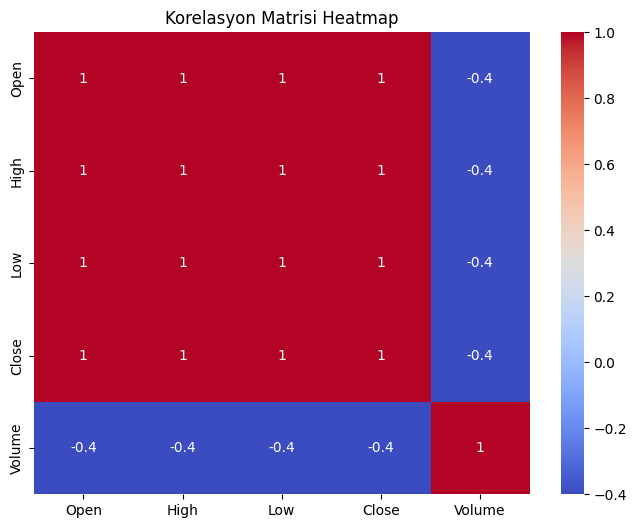

In [19]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Korelasyon Matrisi Heatmap")
plt.show()


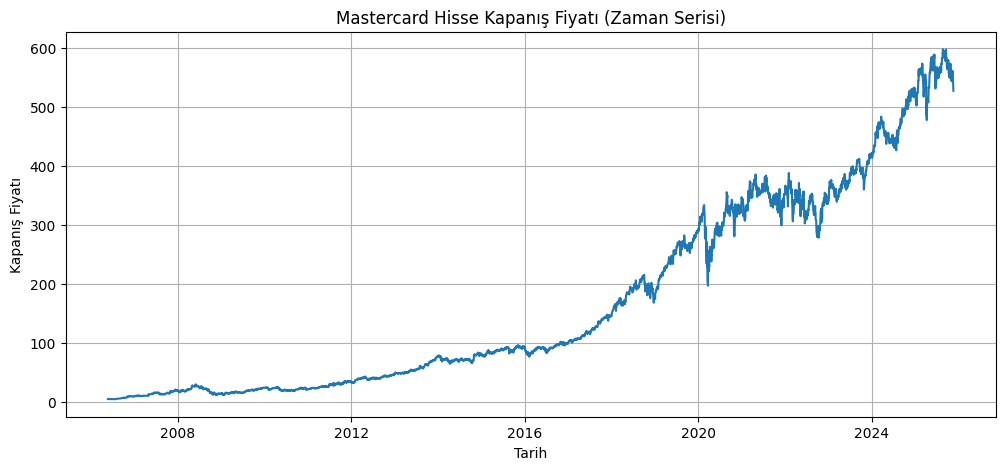

In [20]:
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Close'])
plt.xlabel("Tarih")
plt.ylabel("Kapanış Fiyatı")
plt.title("Mastercard Hisse Kapanış Fiyatı (Zaman Serisi)")
plt.grid(True)
plt.show()


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Modelde kullanılacak özellikler (bağımsız değişkenler)
X = df[['Open', 'High', 'Low', 'Volume']]

# Tahmin etmeye çalıştığımız hedef (bağımlı değişken)
y = df['Close']

# Train / Test ayırma
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((3922, 4), (981, 4))

In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


df["MA7"] = df["Close"].rolling(7).mean()
df["MA14"] = df["Close"].rolling(14).mean()
df["MA30"] = df["Close"].rolling(30).mean()

delta = df["Close"].diff()
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)

avg_gain = gain.rolling(14).mean()
avg_loss = loss.rolling(14).mean()

rs = avg_gain / avg_loss
df["RSI14"] = 100 - (100 / (1 + rs))

df["Close_lag1"] = df["Close"].shift(1)
df["Close_lag3"] = df["Close"].shift(3)
df["Close_lag7"] = df["Close"].shift(7)
df["Volume_lag1"] = df["Volume"].shift(1)

df["Close_20"] = df["Close"].shift(-20)

df = df.dropna()

features = [
    "MA7", "MA14", "MA30",
    "RSI14",
    "Close_lag1", "Close_lag3", "Close_lag7",
    "Volume_lag1"
]

X = df[features]
y = df["Close_20"]


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)



split = int(len(X) * 0.8)  # %80 train – %20 test

X_train, X_test = X_scaled[:split], X_scaled[split:]
y_train, y_test = y[:split], y[split:]


#                     MODELLERI EGIT


models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=300, random_state=42),
    "Decision Tree": DecisionTreeRegressor(max_depth=10, random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=7),
    "SVR": SVR(kernel="rbf", C=500, gamma="auto")
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, pred)

    results.append({
        "Model": name,
        "R2 (%)": round(r2 * 100, 2),
        "RMSE": round(rmse, 3),
        "MSE": round(mse, 3)
    })



results_df = pd.DataFrame(results).sort_values(by="R2 (%)", ascending=False)

print("========================================================")
print("     20 GÜN SONRAKI KAPANIS FIYATINI TAHMIN EDEN MODELLER")
print("========================================================")
print(results_df)


     20 GÜN SONRAKI KAPANIS FIYATINI TAHMIN EDEN MODELLER
               Model  R2 (%)     RMSE        MSE
0  Linear Regression   92.97   22.832    521.322
4                SVR   37.31   68.196   4650.691
3                KNN  -77.90  114.881  13197.629
2      Decision Tree  -89.67  118.621  14071.013
1      Random Forest -101.45  122.247  14944.367


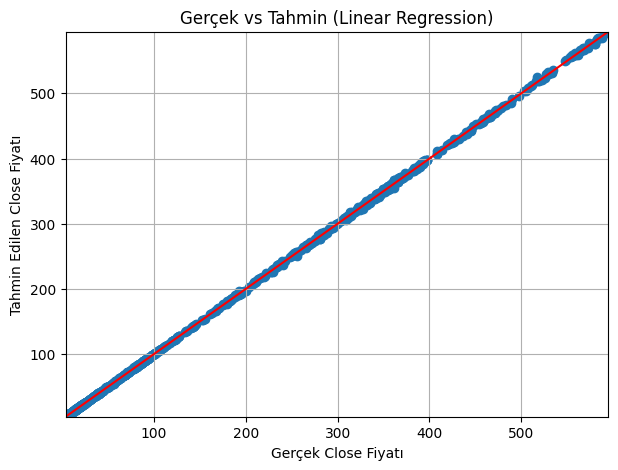

In [23]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred)

plt.xlabel("Gerçek Close Fiyatı")
plt.ylabel("Tahmin Edilen Close Fiyatı")
plt.title("Gerçek vs Tahmin (Linear Regression)")
plt.grid(True)

# ZOOM KISMI
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())

plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)

plt.plot([min_val, max_val], [min_val, max_val], color="red")

plt.show()
